In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
xl = pd.read_excel('blank-check-data.xlsx', sheet_name=None, index_col='CODE')
df_miniseries = xl['MINISERIES']
df_films = xl['FILMS']
df_films.head()

,NAME,MINISERIES,PATREON,NONDIRECTOR,RELEASEDATE,BUDGET,REVENUE,RUNTIME,MINISERIESNAME
CODE,,,,,,,,,
1893,Star Wars: Episode I - The Phantom Menace,STARWARS,False,NaN,1999-05-19,115000000,924317558,136,Star Wars
205587,The Judge,JUDGE,False,NaN,2014-10-08,50000000,83719388,141,Judging the Judge
1894,Star Wars: Episode II - Attack of the Clones,STARWARS,False,NaN,2002-05-15,120000000,649398328,142,Star Wars
22059,The Fantastic Four,FANTASTICFOUR,False,NaN,1994-01-01,1500000,0,90,The Podcastic Two
9738,Fantastic Four,FANTASTICFOUR,False,NaN,2005-06-29,100000000,330579719,106,The Podcastic Two


In [3]:
import glob
import os
corpus_path = 'C:/Users/Rik/Documents/corpus/'
scripts_path = 'imsdb_raw_nov_2015'

filmFiles = {}

for folder in os.scandir(corpus_path + scripts_path):
    if folder.is_dir():
        for file in os.scandir(folder.path):
            if(file.name.endswith('.txt')):
                if not file.name in filmFiles:
                    filmFiles[file.name] = { 'path': file.path }

In [4]:
def cleanFileName(text):
    return text.replace('.txt', '').replace('the', '').replace(':', '')

def cleanTitle(text):
    return text.lower().replace(' ', '').replace('the', '').replace(':', '')

matchedFilms = {}
for filmName, filmInfo in filmFiles.items():
    df_found = df_films[df_films.apply(lambda f: cleanTitle(f['NAME']) == cleanFileName(filmName), axis=1)]
    if(len(df_found)):
        matchedFilms[df_found.index.values.astype(int)[0]] = {
            'FILEPATH': filmInfo['path'],
            'NAME': df_found['NAME'].iloc[0],
            'MINISERIES': df_found['MINISERIES'].iloc[0]
        }

In [5]:
for key, filmInfo in matchedFilms.items():
    print(filmInfo['NAME'], filmInfo['MINISERIES'], filmInfo['FILEPATH'])

The Abyss CAMERON C:/Users/Rik/Documents/corpus/imsdb_raw_nov_2015\Action\abyssthe.txt
Aliens CAMERON C:/Users/Rik/Documents/corpus/imsdb_raw_nov_2015\Action\aliens.txt
Avatar CAMERON C:/Users/Rik/Documents/corpus/imsdb_raw_nov_2015\Action\avatar.txt
The Avengers MCU C:/Users/Rik/Documents/corpus/imsdb_raw_nov_2015\Action\avengersthe.txt
Batman BURTON C:/Users/Rik/Documents/corpus/imsdb_raw_nov_2015\Action\batman.txt
The Dark Knight Rises NOLAN C:/Users/Rik/Documents/corpus/imsdb_raw_nov_2015\Action\darkknightrisesthe.txt
The Fantastic Four FANTASTICFOUR C:/Users/Rik/Documents/corpus/imsdb_raw_nov_2015\Action\fantasticfour.txt
Heat MANN C:/Users/Rik/Documents/corpus/imsdb_raw_nov_2015\Action\heat.txt
Inception NOLAN C:/Users/Rik/Documents/corpus/imsdb_raw_nov_2015\Action\inception.txt
Lost in Space LOSTINSPACE C:/Users/Rik/Documents/corpus/imsdb_raw_nov_2015\Action\lostinspace.txt
The Matrix Reloaded WACHOWSKI C:/Users/Rik/Documents/corpus/imsdb_raw_nov_2015\Action\matrixreloadedthe.tx

In [6]:
df_matched_films = pd.DataFrame.from_dict(matchedFilms, orient='index')
df_matched_films.head()

,FILEPATH,NAME,MINISERIES
74,C:/Users/Rik/Documents/corpus/imsdb_raw_nov_20...,War of the Worlds,SPIELBERG
77,C:/Users/Rik/Documents/corpus/imsdb_raw_nov_20...,Memento,NOLAN
82,C:/Users/Rik/Documents/corpus/imsdb_raw_nov_20...,Miami Vice,MANN
162,C:/Users/Rik/Documents/corpus/imsdb_raw_nov_20...,Edward Scissorhands,BURTON
180,C:/Users/Rik/Documents/corpus/imsdb_raw_nov_20...,Minority Report,SPIELBERG


In [7]:
df_director_miniseries = df_miniseries[df_miniseries['DIRECTOR']]
df_director_miniseries.head()

,NAME,DIRECTOR,STANDALONE,BENSCHOICE,FAMILYCHOICE,GUESTCHOICE,COMMENTARY,PATREON
CODE,,,,,,,,
SHYAMALAN,Pod Night Shyamacast,True,False,False,False,False,False,False
WACHOWSKI,Podchowski Casters,True,False,False,False,False,False,False
CROWE,We Pod A Cast,True,False,False,False,False,False,False
CAMERON,Podinator: Judgment Cast,True,False,False,False,False,False,False
SPIELBERG,Pod Me If You Cast,True,False,False,False,False,False,False


In [8]:
df_director_films = df_matched_films[df_matched_films['MINISERIES'].isin(df_director_miniseries.index.values)]
df_director_films.head()

,FILEPATH,NAME,MINISERIES
74,C:/Users/Rik/Documents/corpus/imsdb_raw_nov_20...,War of the Worlds,SPIELBERG
77,C:/Users/Rik/Documents/corpus/imsdb_raw_nov_20...,Memento,NOLAN
82,C:/Users/Rik/Documents/corpus/imsdb_raw_nov_20...,Miami Vice,MANN
162,C:/Users/Rik/Documents/corpus/imsdb_raw_nov_20...,Edward Scissorhands,BURTON
180,C:/Users/Rik/Documents/corpus/imsdb_raw_nov_20...,Minority Report,SPIELBERG


In [9]:
def removeTopHtml(text):
    topHtml = "<b><!--\n\n</b>if (window!= top)\n\ntop.location.href=location.href\n\n<b>// -->\n\n</b>"
    return text.replace(topHtml, '')

def removeNewLines(text):
    return text.replace('\n', ' ')

def removeTabs(text):
    return text.replace('\t', ' ')

def cleanText(text):
    return removeTabs(removeNewLines(removeTopHtml(text)))

def getScriptText(filename):
    with open(filename, 'r') as infile:
        return cleanText(infile.read())

miniseriesScripts = []
for miniseries, group_films in df_director_films.groupby(['MINISERIES']):
    currentScripts = ''
    for index, film in group_films.iterrows():
        currentScripts += ' ' + getScriptText(film['FILEPATH'])
    miniseriesScripts.append({
        'NAME': miniseries,
        'SCRIPTS': currentScripts
    })
df_miniseries_scripts = pd.DataFrame(miniseriesScripts)
df_miniseries_scripts.head()

,NAME,SCRIPTS
0,BIGELOW,S T R A N G E D A Y S by James Cam...
1,BROOKS,SPANGLISH ...
2,BURTON,Edward Sissorhands OLD KIM Snuggle in...
3,CAMERON,""" T E R M I N A T O R ""..."
4,CROWE,ALMOST FAMOUS by Cameron Crowe's <b><!-- <...


In [12]:
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer() # Stemmer for reducing terms to root form

stemmed_corpus = []       # For storing the stemmed tokens

original_corpus = []      # For storing the non-stemmed tokens

for idx, row in df_miniseries_scripts.iterrows():                # Iterate over the files

    tokens = word_tokenize(row['SCRIPTS'])     # Extract tokens

    stemmed = [stemmer.stem(token.lower()) for token in tokens] # Stem tokens

    stemmed_corpus.append(stemmed)    # Store stemmed document

    original_corpus.append(tokens)    # Store original document

In [13]:
from gensim.corpora import Dictionary
dictionary = Dictionary(stemmed_corpus) # Build the dictionary

In [14]:
from gensim.models import TfidfModel

# Convert to vector corpus

vectors = [dictionary.doc2bow(text) for text in stemmed_corpus]

# Build TF-IDF model

tfidf = TfidfModel(vectors)

In [26]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

def generateWordCloud(scripts):
    # Get TF-IDF weights
    
    weights = tfidf[scripts]

    # Get terms from the dictionary and pair with weights

    weights = {dictionary[key]: value for key, value in weights}

    wc = WordCloud(
        background_color="white",
        max_words=2000,
        width = 1024,
        height = 720,
        stopwords=stopwords.words("english")
    )

    # Generate the cloud

    wc.generate_from_frequencies(weights)
    
    plt.figure()
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

Generating wordcloud for miniseries BIGELOW


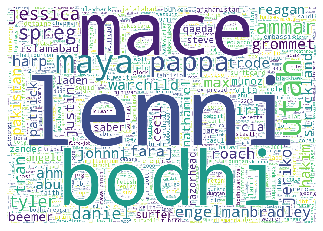

Generating wordcloud for miniseries BROOKS


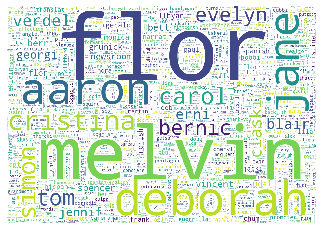

Generating wordcloud for miniseries BURTON


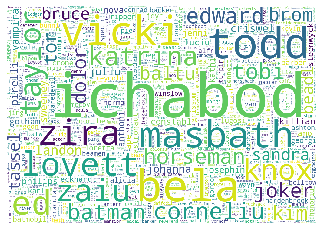

Generating wordcloud for miniseries CAMERON


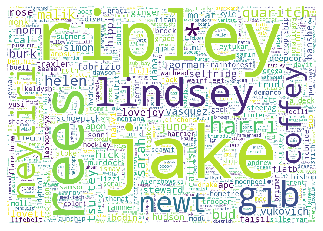

Generating wordcloud for miniseries CROWE


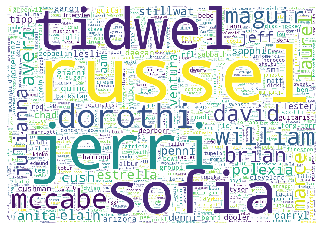

Generating wordcloud for miniseries LEE


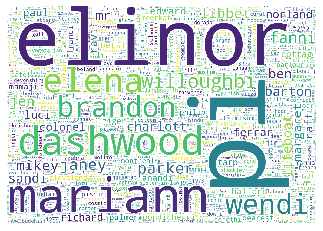

Generating wordcloud for miniseries MANN


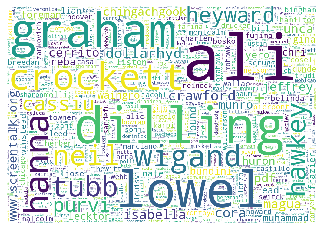

Generating wordcloud for miniseries NOLAN


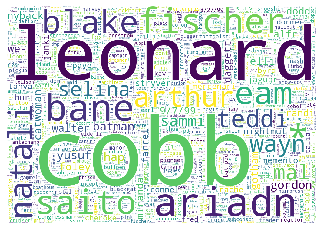

Generating wordcloud for miniseries SHYAMALAN


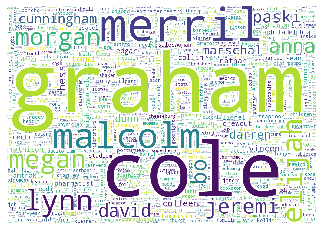

Generating wordcloud for miniseries SPIELBERG


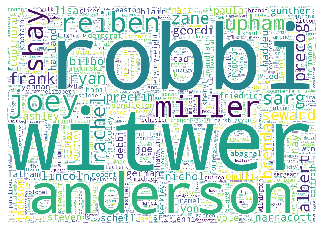

Generating wordcloud for miniseries VERHOEVEN


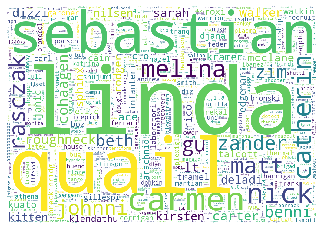

Generating wordcloud for miniseries WACHOWSKI


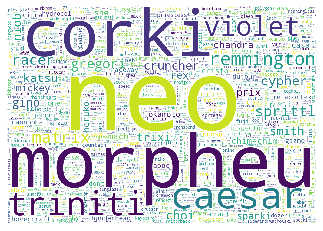

In [28]:
for idx, row in df_miniseries_scripts.iterrows():
    print("Generating wordcloud for miniseries", row['NAME'])
    generateWordCloud(vectors[idx])